In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [2]:
data = pd.read_excel("C:\\Users\\bnola\\Documents\\Coding practice\\2018-2019 NHL Stats+Salary.xlsx")

In [3]:
data

,PLAYER,TEAM,AGE,POS,HANDED,GP,G,A,P,P/GP,+/-,Sh,Sh%,TOI,CAP HIT,SALARY
0,1. Zdeno Chara,BOS,41,LD,Left,62,5,9,14,0.23,22,99,0.05,21:04:00,5000000,5000000
1,2. Marián Hossa,ARI,39,RW,Left,0,0,0,0,0,0,0,0,NaN,5275000,1000000
2,3. Joe Thornton,SJS,38,C,Left,73,16,35,51,0.7,8,90,0.18,15:32:00,5000000,5000000
3,4. Johan Franzen,DET,38,"RW, LW",Left,0,0,0,0,0,0,0,0,NaN,3954545,1000000
4,5. Ryan Miller,ANA,37,G,Left,20,-,-,-,-,-,-,-,-,2000000,2000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496. Sean Kuraly,BOS,25,"C, LW",Left,71,8,13,21,0.3,6,134,0.06,13:46:00,1275000,1300000
496,497. Matt Puempel,DET,25,LW,Left,8,1,0,1,0.13,-2,10,0.1,10:24:00,675000,650000
497,498. Rocco Grimaldi,NSH,25,"LW, RW",Right,53,5,8,13,0.25,-2,81,0.06,10:00:00,650000,650000
498,499. Dillon Simpson,CBJ,25,LD,Left,0,0,0,0,0,0,0,0,NaN,675000,650000


In [4]:
df = data.dropna(axis=0, how='any')

In [5]:
players = df.mask(df.POS == 'G')
players = players.dropna(axis=0, how='any')

In [6]:
players = players.drop(['TOI', 'CAP HIT'], axis=1)

In [7]:
Y = players['SALARY'].values

In [8]:
Y = Y/1000000.000

In [33]:
X = players.drop(['PLAYER','TEAM', 'POS', 'HANDED', 'SALARY'], axis=1).values

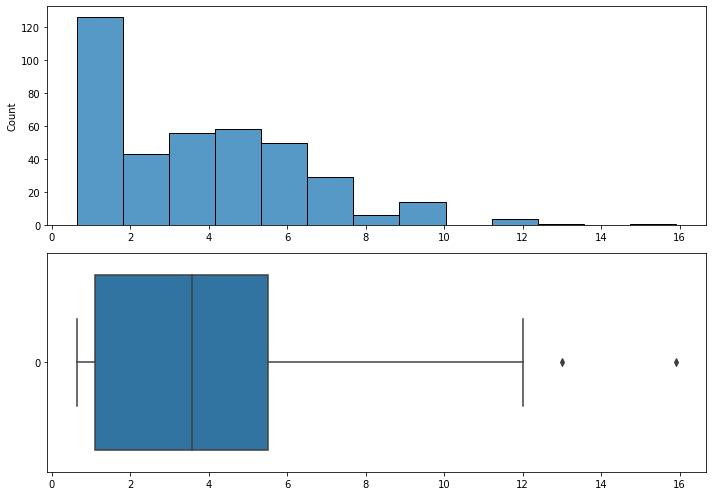

In [34]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.histplot(data=Y)
fig.add_subplot(2,1,2)
sns.boxplot(data=Y, orient='h')
plt.tight_layout()

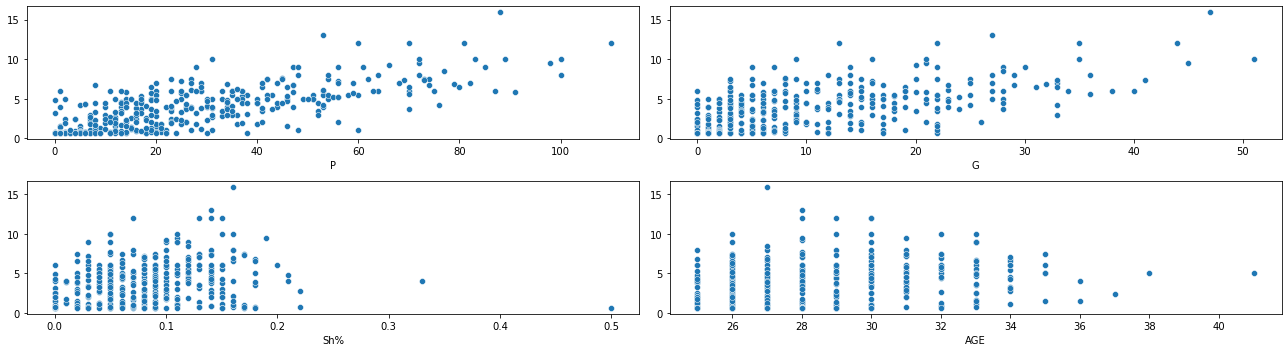

In [35]:
fig = plt.figure(figsize=(18,5));
fig.add_subplot(2,2,1)
sns.scatterplot(x=players['P'],y= Y)
fig.add_subplot(2,2,2)
sns.scatterplot(x=players['G'],y= Y)
fig.add_subplot(2,2,3)
sns.scatterplot(x=players['Sh%'],y= Y)
fig.add_subplot(2,2,4)
sns.scatterplot(x=players['AGE'],y= Y);
fig.tight_layout()

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [52]:
from sklearn import preprocessing
s_scaler = preprocessing.StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [53]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print(regressor.intercept_)
print(regressor.coef_)

3.6271093917525774
[ 0.50457379 -0.12546699 -0.25754856  0.87201784  0.45205802  0.32738131
 -0.14886683  0.87229618 -0.09459165]


In [54]:
y_pred_reg = regressor.predict(X_test)

In [55]:
coeff_df = pd.DataFrame(regressor.coef_, players.drop(['PLAYER','TEAM', 'POS', 'HANDED', 'SALARY'], axis=1).columns, columns=['Coefficient'])
coeff_df

,Coefficient
AGE,0.504574
GP,-0.125467
G,-0.257549
A,0.872018
P,0.452058
P/GP,0.327381
+/-,-0.148867
Sh,0.872296
Sh%,-0.094592


<Figure size 720x360 with 0 Axes>

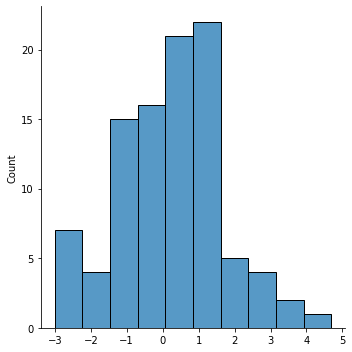

In [56]:
fig = plt.figure(figsize=(10,5));
resids = (Y_test - y_pred_reg)
sns.displot(resids);

In [57]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
0,7.65,6.339392
1,5.00,3.655805
2,1.95,1.426771
3,0.65,0.634217
4,0.65,0.834036
5,6.10,4.849707
6,2.00,1.764089
7,4.00,2.831486
8,1.10,2.394571
9,4.60,5.158745


In [58]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(Y_test,y_pred))

MAE: 1.163513425433011
MSE: 2.1836276519407227
RMSE: 1.4777102733420793
VarScore: 0.6790989490023165


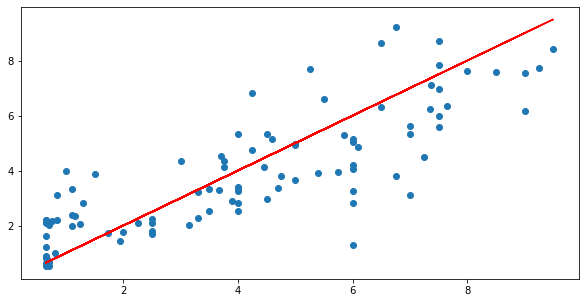

In [59]:
fig = plt.figure(figsize=(10,5))
plt.scatter(df['Actual'], df['Predicted'])
plt.plot(df['Actual'], df['Actual'],'r')

In [60]:
model = keras.Sequential([keras.layers.Dense(9, activation='relu'), 
                          keras.layers.Dense(9, activation='relu'),
                          keras.layers.Dense(9, activation='relu'),
                          keras.layers.Dense(1)])
model.compile(loss='mse',
                optimizer='Adam')
history = model.fit(x=X_train, y=Y_train, batch_size=45, epochs=100, validation_data=(X_test, Y_test))
y_pred = model.predict(X_test)

Epoch 1/100
7/7 [==============================] - 0s 32ms/step - loss: 22.9732 - val_loss: 25.2556
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 21.9389 - val_loss: 24.1521
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 21.0164 - val_loss: 23.1022
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 20.1471 - val_loss: 22.0965
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 19.2647 - val_loss: 21.1309
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 18.4432 - val_loss: 20.1507
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 17.5765 - val_loss: 19.1619
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 16.6984 - val_loss: 18.1262
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 15.7619 - val_loss: 17.0817
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 14.8412 - val_loss: 15.9871
Epoch 11

MAE: 1.2868408278435777
MSE: 2.9656964590038895
RMSE: 1.7221197574512317
VarScore: 0.5634789885617526


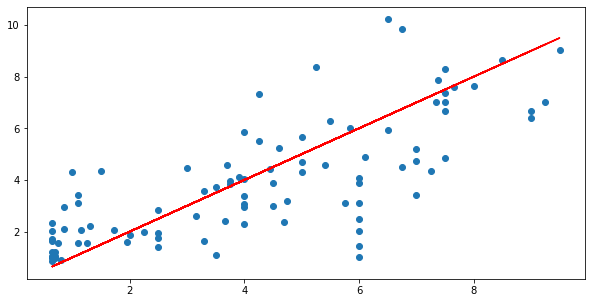

In [61]:
fig = plt.figure(figsize=(10,5))
plt.scatter(Y_test,y_pred)
plt.plot(Y_test,Y_test,'r')
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(Y_test,y_pred))

<AxesSubplot:>

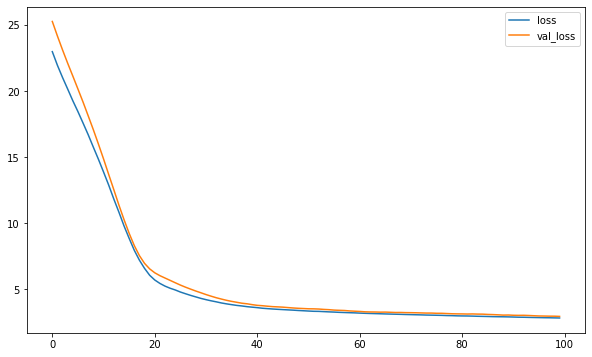

In [62]:
loss_df = pd.DataFrame(history.history)
loss_df.plot(figsize=(10,6))